# Titanic Spaceship Preprocessing: Data Transformation and Feature Selection

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [19]:
X_train = pd.read_csv("spaceship_train_X.csv")
X_test = pd.read_csv("spaceship_test_X.csv")
y_train = pd.read_csv("spaceship_train_y.csv")

## Feature dropping

In [20]:
X_train.drop(['Unnamed: 0','PassengerId', 'Group', 'GroupSize', 'AgeGroup', 'CabinNum'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0','PassengerId', 'Group', 'GroupSize', 'AgeGroup', 'CabinNum'], axis=1, inplace=True)

In [21]:
X_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,FamilySize
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,...,S,1,0,0,0,0,0,0,1.0,8
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,...,S,1,0,0,0,0,0,0,1.0,4
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,...,S,1,0,0,0,0,0,0,1.0,6
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,...,S,1,0,0,0,0,0,0,1.0,2
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,...,S,1,0,0,0,0,0,0,1.0,5


## Log-Transform
Apply log-transform for heavily-skewed values, like expense-related cols.

In [22]:
X_train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Expenditure', 'NoSpending', 'Solo', 'CabinDeck', 'CabinSide',
       'CabinRegion_1', 'CabinRegion_2', 'CabinRegion_3', 'CabinRegion_4',
       'CabinRegion_5', 'CabinRegion_6', 'CabinRegion_7', 'CabinRegion',
       'FamilySize'],
      dtype='object')

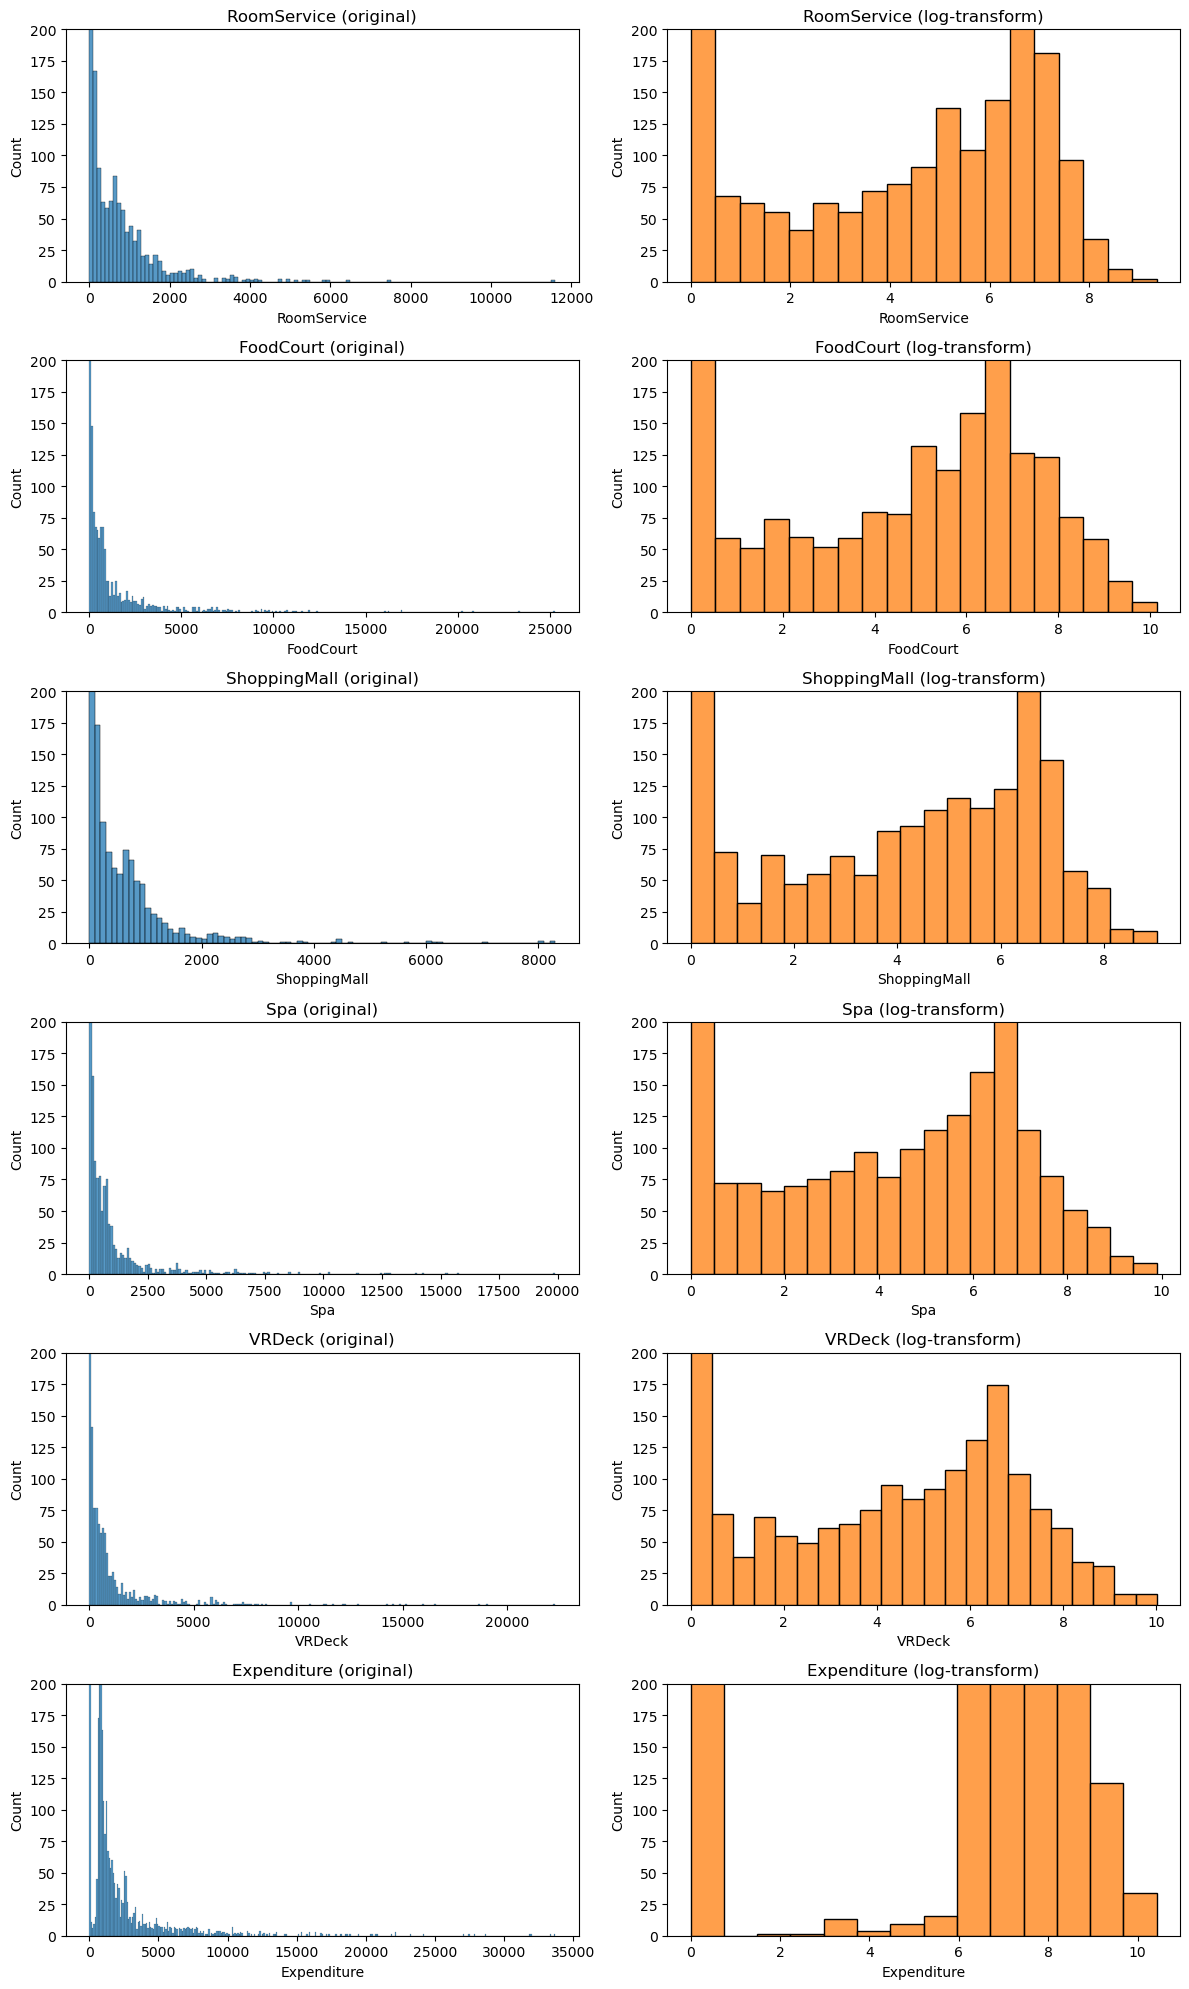

In [23]:
fig = plt.figure(figsize=(12, 20))

for i, col in enumerate(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']):
    plt.subplot(6, 2, 2*i+1)
    sns.histplot(X_test[col], binwidth=100)
    plt.ylim([0, 200])
    plt.title(f'{col} (original)')

    plt.subplot(6, 2, 2*i+2)
    sns.histplot(np.log(1+X_test[col]), color='C1')
    plt.ylim([0, 200])
    plt.title(f'{col} (log-transform)')

plt.tight_layout()
plt.show()

In [24]:
# Apply log-transform

for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']:
    X_test[col] = np.log(1+X_test[col])
    X_train[col] = np.log(1+X_train[col])

## Scaling and Encoding

In [25]:
X_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,FamilySize
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.000000,0.000000,0.000000,0.000000,...,S,1,0,0,0,0,0,0,1.0,8
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.000000,2.302585,0.000000,7.945910,...,S,1,0,0,0,0,0,0,1.0,4
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.000000,0.000000,0.000000,0.000000,...,S,1,0,0,0,0,0,0,1.0,6
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.000000,8.802823,0.000000,5.204007,...,S,1,0,0,0,0,0,0,1.0,2
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,2.397895,0.000000,6.455199,0.000000,...,S,1,0,0,0,0,0,0,1.0,5


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [32]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
# categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))])

# ct = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ], 
#     remainder='passthrough'
# )

# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)

# print("X_train shape: ", X_train.shape)

In [27]:
X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,FamilySize
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,...,P,1,0,0,0,0,0,0,1.0,4
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,...,S,1,0,0,0,0,0,0,1.0,4
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,...,S,1,0,0,0,0,0,0,1.0,7
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,...,S,1,0,0,0,0,0,0,1.0,7
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,...,S,1,0,0,0,0,0,0,1.0,9


In [28]:
print(numerical_cols)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'NoSpending', 'Solo', 'CabinRegion_1', 'CabinRegion_2', 'CabinRegion_3', 'CabinRegion_4', 'CabinRegion_5', 'CabinRegion_6', 'CabinRegion_7', 'CabinRegion', 'FamilySize']


In [33]:
print(categorical_cols)

['HomePlanet', 'Cabin', 'Destination', 'CabinDeck', 'CabinSide']


In [30]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

In [36]:
onehotencoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_train_data = onehotencoder.fit_transform(X_train[categorical_cols])
encoded_test_data = onehotencoder.fit_transform(X_test[categorical_cols])

/home/sobaqov/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sobaqov/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
